# Ford Go (Bay Wheels by Lyft) Data set visualisation
## Suryaday Nath

## Investigation Overview

> In this visualisation exercise, the goal was to understand rental patterns of bikes by the type of users. The rental patterns included understanding the most number of rentals based on month, day of the week and time of the day. 

## Dataset Overview

* Bay Wheels is a regional public bicycle sharing system operated by Motivate in partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District, in the San Francisco Bay Area, California. 


* The Ford Go Bike data (now Bay Wheels' trip data) is a comprehensive and very neatly designed dataset. It provides users to explore various facets of the usage detail and statistic of the data related to bike rentals. These data were collected efficiently, providing valuable data gathering to work with and draw conclusions.


* This Notebook uses data gathered between January 2018 and December 2018. Roughly 1,850,000 bike rides is registered in the San Francisco Bay area of California , USA.

In [14]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import glob
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bikee.csv')

## Distance travelled in Miles by different users

It can be seen that most number of Subscribers travel a distance concentrated within 0.4 to 0.6 miles and 0.8 to 0.9 miles range. 

It can be speculated that the demographics of Subscribers may be a mix of:

a) Office goers and students who use the bikes for convenience - shorter distance travel between the nearest train station perhaps to the office or school. 

b) Tourists with subscription who use the bikes more casually to explore the area. 

While for Customers it can be seen that their travel is distributed across all distances. What is unique about this distribution is that a huge number of customers are travelling within 0 to 0.1 miles. 

Thus, one implication of this observation might be that Customers are using the bikes more leisurely than Subscribers.

For Bike share for all scheme users, they are renting it for lesser duration and also riding it for less miles i.e. 0.4 to 0.6 miles comparatively. It might imply that they are using the bikes for day-to-day usage or tasks. 

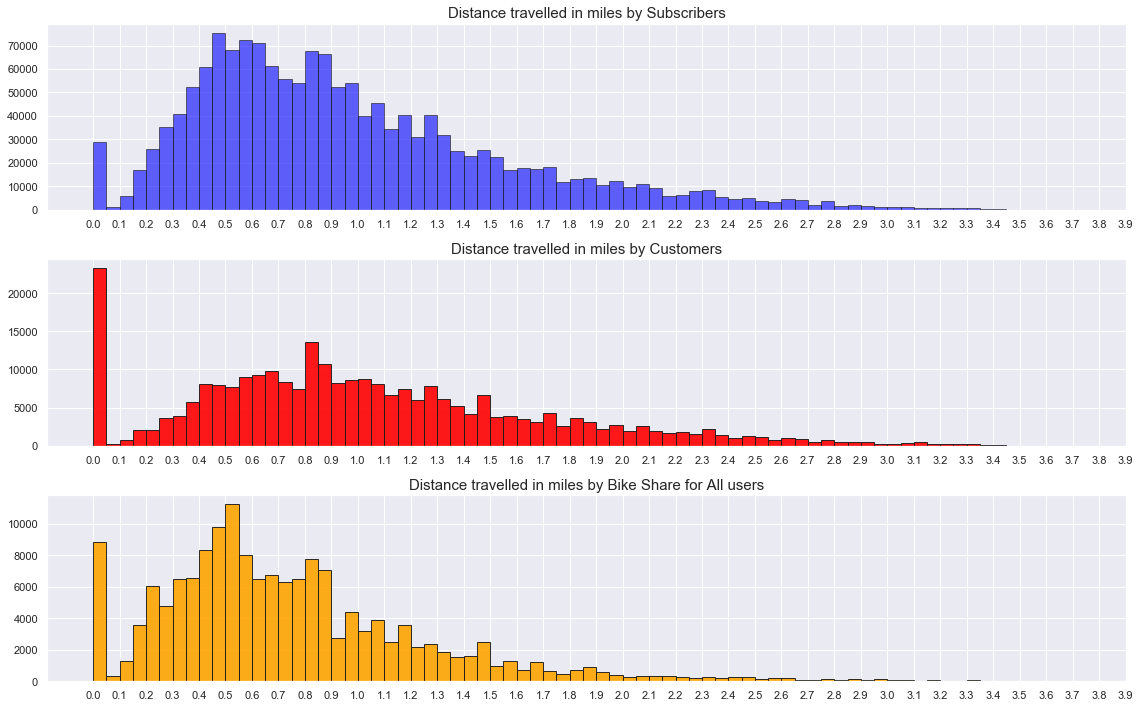

In [38]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=3, figsize = [16, 10])

sub = df[df.user_type=='Subscriber']
bins1 = np.arange(0, 3.5, 0.05)
bins2 = 10 ** np.arange(0, 0.5, 0.008)

ax[0].hist(sub.distance_miles, bins=bins1, color='blue', alpha=0.6, edgecolor='k')
plt.sca(ax[0])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Subscribers", fontsize=15)

cust = df[df.user_type=='Customer']
bins1 = np.arange(0, 3.5, 0.05)
bins2 = 10 ** np.arange(0, 0.5, 0.008)

ax[1].hist(cust.distance_miles, bins=bins1, color='red', alpha=0.9, edgecolor='k')
plt.sca(ax[1])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Customers", fontsize=15)

ax[2].hist(df[df.bike_share_for_all_trip == 'Yes'].distance_miles, bins=bins1, color='orange', alpha = 0.9, edgecolor='k')
plt.sca(ax[2])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Bike Share for All users", fontsize=15)


plt.tight_layout()
plt.show()

## Start hour of rental for Customers and Subscribers

Looking at the plots below, it is clear that there is a stark difference between the start hour of rentals for Customers and Subscribers. 

Start hour of rentals peak during the later part of the day and towards evening for Customers. 

Start hour of rentals for Subscribers follow the pattern where peak timings are between 7-9 and 4-6 in the evening. Which are usually office and school starting and ending hours. Which again points to the fact that Subscribers may be mostly office goers and school kids and Customers may mostly be travellers. 

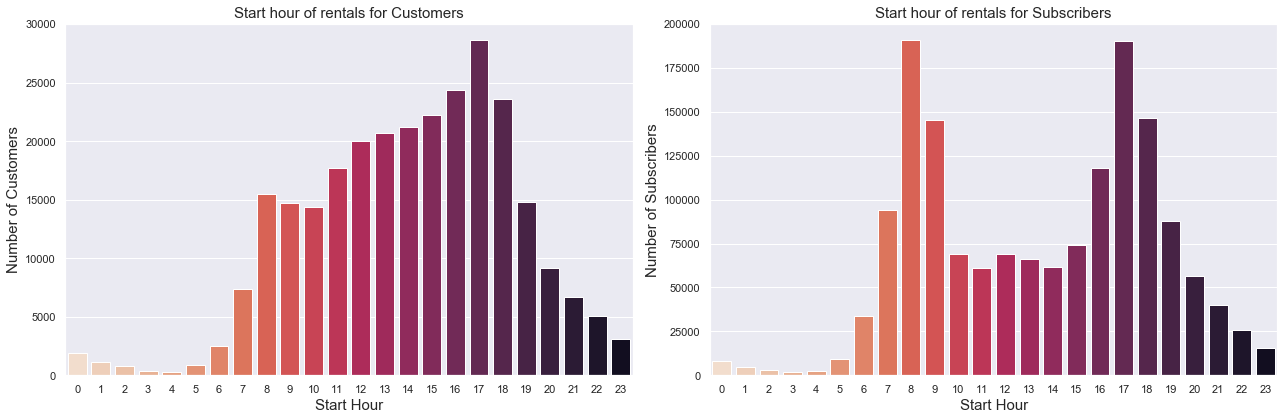

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[18, 6])

sns.countplot(data = df[df.user_type=='Customer'], x = 'start_hour', ax=ax[0], palette='rocket_r')
sns.countplot(data = df[df.user_type=='Subscriber'], x = 'start_hour', ax=ax[1], palette='rocket_r')

plt.sca(ax[0])
plt.title("Start hour of rentals for Customers", fontsize=15)
plt.xlabel("Start Hour", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

plt.sca(ax[1])
plt.title("Start hour of rentals for Subscribers", fontsize=15)
plt.xlabel("Start Hour", fontsize=15)
plt.ylabel("Number of Subscribers", fontsize=15)

plt.tight_layout()
plt.show()

## Month-wise rental pattern of users

The pattern here is somewhat similar with the months May-October being the months which see the most number of rentals with the peak for Customers on July and for Subscribers on October. 

For Customers, demand peaks for July which sees good weather and demand wanes off during September, October (maybe because the region sees the highest temperature during that time and there aren't many travellers). 

October is one of the busiest months in San Francisco because of a multitude of events and attractions during that time and maybe the company sees a lot of conversions from Customers to Subscribers during that time.

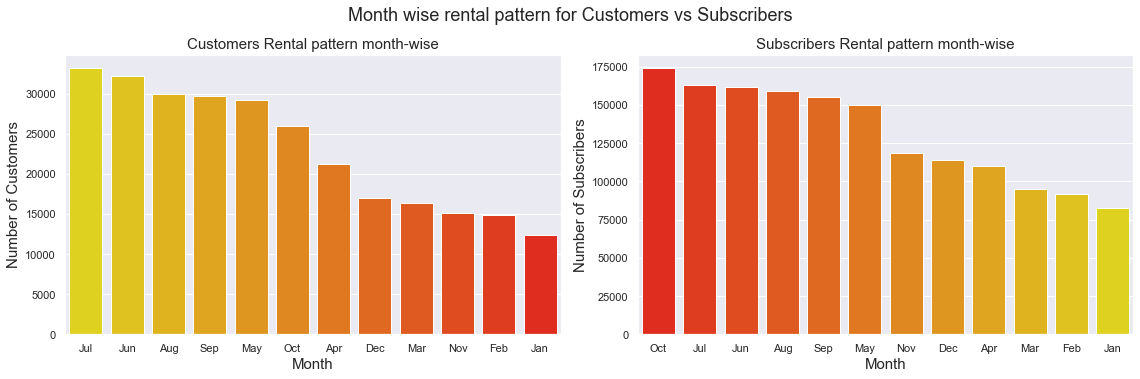

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [16, 5], sharey=False)

plt.suptitle("Month wise rental pattern for Customers vs Subscribers", y=1.05, fontsize=18)

a = df[df.user_type == 'Subscriber'].start_month.value_counts()
b = a.index
c = df[df.user_type == 'Customer'].start_month.value_counts()
d = c.index

sns.barplot(b, a, palette='autumn', ax=ax[1])
sns.barplot(d, c, palette='autumn_r', ax=ax[0])

plt.sca(ax[0])
plt.title("Customers Rental pattern month-wise", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

plt.sca(ax[1])
plt.title("Subscribers Rental pattern month-wise", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Subscribers", fontsize=15)

plt.tight_layout()
plt.show()

## Start hour vs Day of the week rental pattern for Subscribers

Subscribers seem to be renting the bikes during weekdays mostly (office and school days) with the exact same pattern of start hour every day (office or school hours). 

During Saturdays and Sundays, demand wanes off with very few Subscribers renting the bikes compared to weekdays and also the start hour seem to start late than usual. This could be the "Traveller" section of the Subscribers. 

So, Subscribers can very likely be office goers and students. 

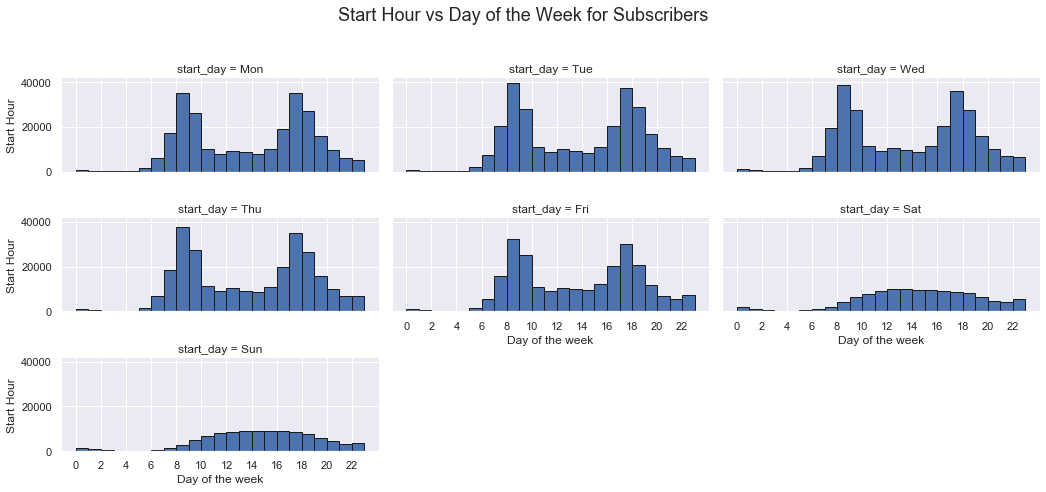

In [41]:
d_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sub = df[df.user_type=='Subscriber']

g = sns.FacetGrid(sub, col='start_day', col_wrap=3, height=8.27/4, aspect=(14.70)/3/(8.27/4), \
                  col_order=d_order, sharex=True, sharey=True)
g = (g.map(plt.hist, 'start_hour', bins=np.arange(0, 24, 1), edgecolor='k').set_axis_labels("Day of the week", "Start Hour"))
g.set(xticks=np.arange(0, 24, 2))

plt.suptitle("Start Hour vs Day of the Week for Subscribers", fontsize=18, y=1.1)
plt.tight_layout()
plt.show()

## Start hour vs Day of the week rental pattern for Customers

For Customers, during weekdays, the start hour starts late for rentals compared to Subscribers. During weekends, demands peaks and is much more compared to weekdays. The demand peaks in the afternoon and continues on till evening. 

So, Customers may be tourists in that area. 

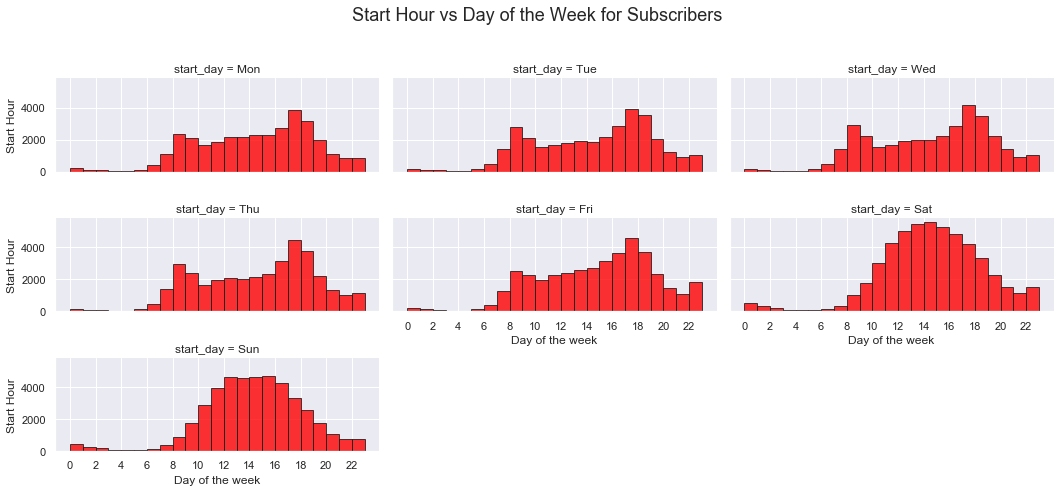

In [42]:
cust = df[df.user_type=='Customer']

g = sns.FacetGrid(cust, col='start_day', col_wrap=3, height=8.27/4, aspect=(14.70)/3/(8.27/4), \
                  col_order=d_order, sharex=True, sharey=True)

g = (g.map(plt.hist, 'start_hour', bins=np.arange(0, 24, 1), color='red', alpha=0.8, edgecolor='k') \
     .set_axis_labels("Day of the week", "Start Hour"))
g.set(xticks=np.arange(0, 24, 2))

plt.suptitle("Start Hour vs Day of the Week for Subscribers", fontsize=18, y=1.1)
plt.show()

## Heat Map showing distribution of Start hour and day of the week for Subscribers

The heat map corroborates the observation seen previously in the case of Subscribers that maximum rentals are during Weekdays than on Weekends with 7-9 in the morning and 4-6 in the evening seeing the maximum rentals. 

Demands falls off rapidly during weekends when the schools and offices are closed and Subscribers do not need to commute as usual. 

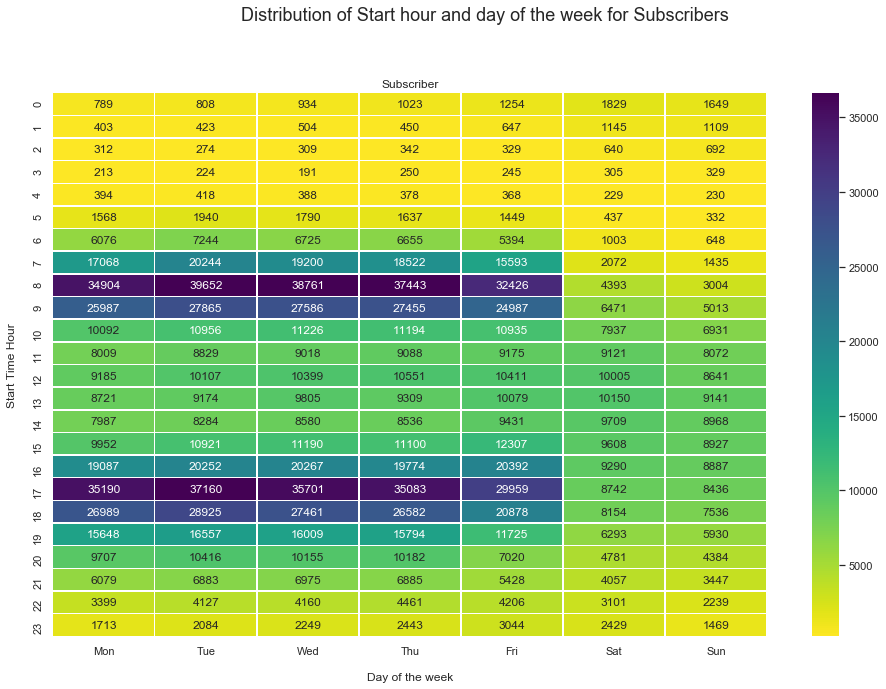

In [46]:
sns.set(rc={'figure.figsize':(16, 10)})

test_sub = df[df.user_type=='Subscriber']

test_sub = test_sub.groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();

test_sub = test_sub.pivot('start_hour', 'start_day', 'bike_id')

test2 = test_sub[d_order]

heat_map = sns.heatmap(test2, cmap = 'viridis_r', annot=True, robust=True, fmt='d', linewidths=.5)

plt.title('Subscriber', y=1.05)
plt.xlabel('Day of the week', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)
plt.suptitle("Distribution of Start hour and day of the week for Subscribers", fontsize=18, y=1)

plt.show()

## Heat Map showing distribution of Start hour and day of the week for Customers

The Heat Map corroborates the previous observation that Customers rent the bikes mostly during weekends, where the dark blue area shows the maximum concentration of rentals and number of rentals during weekends which is much higher(2x or 3x) than on weekdays. So, Customers might be tourists as weekends see the maximum influx of tourists and tourist activities.

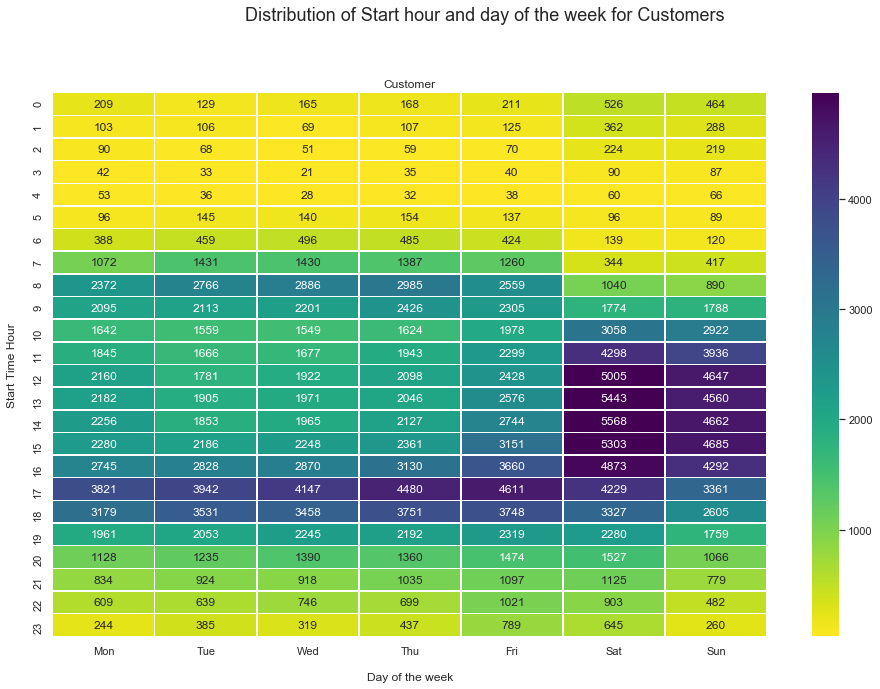

In [45]:
test_cust = df[df.user_type=='Customer']

test_cust = test_cust.groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();

test_cust = test_cust.pivot('start_hour', 'start_day', 'bike_id')

test2 = test_cust[d_order]

heat_map = sns.heatmap(test2, cmap = 'viridis_r', annot=True, robust=True, fmt='d', linewidths=.5)

plt.title('Customer', y=1.05)
plt.xlabel('Day of the week', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.suptitle("Distribution of Start hour and day of the week for Customers", fontsize=18, y=1)

plt.show()

## Summary:
    
This project is environmental friendly, pocket friendly and also caters to a wide variety of people and has the ability to benefit different sections of society in a sustainable manner. 

Subscribers who can mostly be called regular commuters benefit from a quick eco-friendly and budget-friendly yet flexible, city transportation option. 

Customers have a sustainable and easy way to explore the beautiful Bay area while people from all socioeconomic classes can enjoy convenient and affordable transport. 

The system uses two types of clients: Subscribers and Clients.

Subscribers are primarily frequent drivers, making brief rides to and from work, renting a bike at 7-9am and 4-6pm on weekdays, and Customers are generally tourists who use the system to explore the Bay Area mainly on weekends.